In [2]:
#approach1

C:\Users\SaikishorePichili\anaconda3\Lib\site-packages\sentence_transformers\cross_encoder\CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


No sentence-transformers model found with name sentence-transformers/all-MiniLM-L6-v2. Creating a new one with mean pooling.
C:\Users\SaikishorePichili\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
C:\Users\SaikishorePichili\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\SaikishorePichili\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


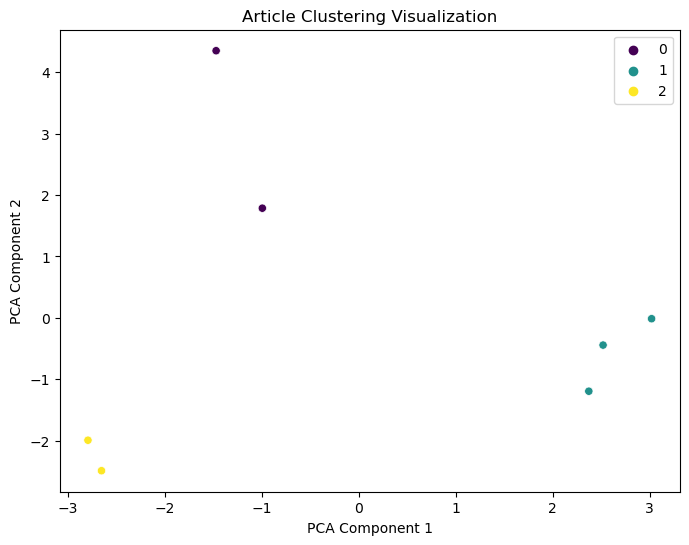

                                             Article  Cluster
0  Artificial intelligence is transforming indust...        1
1  Machine learning is a subset of AI that focuse...        1
2  Deep learning utilizes neural networks for com...        1
3  The stock market fluctuates based on economic ...        2
4  Cryptocurrency markets exhibit high volatility...        2
5  Climate change impacts global weather patterns...        0
6  Renewable energy sources like solar and wind p...        0


In [1]:
import numpy as np
import pandas as pd
import torch
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sentence_transformers import SentenceTransformer
import matplotlib.pyplot as plt
import seaborn as sns


articles = [
    "Artificial intelligence is transforming industries worldwide.",
    "Machine learning is a subset of AI that focuses on pattern recognition.",
    "Deep learning utilizes neural networks for complex tasks like image recognition.",
    "The stock market fluctuates based on economic indicators and investor sentiment.",
    "Cryptocurrency markets exhibit high volatility and speculative trading behaviors.",
    "Climate change impacts global weather patterns and sea levels.",
    "Renewable energy sources like solar and wind power are crucial for sustainability."
]


model = SentenceTransformer('all-MiniLM-L6-v2')
embeddings = model.encode(articles, convert_to_tensor=True)


pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings.cpu().detach().numpy())


n_clusters = 3 
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(reduced_embeddings)


article_df = pd.DataFrame({
    "Article": articles,
    "Cluster": clusters
})


plt.figure(figsize=(8, 6))
sns.scatterplot(x=reduced_embeddings[:, 0], y=reduced_embeddings[:, 1], hue=clusters, palette="viridis")
plt.title("Article Clustering Visualization")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()


print(article_df)


In [3]:
#approach2

In [4]:
words = [word.lower() for article in articles for word in article.split()]
unique_words = list(set(words))

In [5]:
unique_words

['subset',
 'industries',
 'climate',
 'crucial',
 'renewable',
 'machine',
 'based',
 'levels.',
 'wind',
 'patterns',
 'is',
 'focuses',
 'global',
 'weather',
 'markets',
 'economic',
 'sustainability.',
 'utilizes',
 'stock',
 'learning',
 'market',
 'sources',
 'impacts',
 'ai',
 'like',
 'indicators',
 'and',
 'energy',
 'speculative',
 'trading',
 'solar',
 'cryptocurrency',
 'change',
 'on',
 'fluctuates',
 'tasks',
 'a',
 'behaviors.',
 'pattern',
 'worldwide.',
 'transforming',
 'recognition.',
 'sentiment.',
 'that',
 'are',
 'volatility',
 'image',
 'sea',
 'the',
 'of',
 'investor',
 'exhibit',
 'intelligence',
 'networks',
 'for',
 'complex',
 'artificial',
 'neural',
 'power',
 'deep',
 'high']

In [6]:
model = SentenceTransformer('all-MiniLM-L6-v2')
embeddings = model.encode(unique_words, convert_to_tensor=True)


No sentence-transformers model found with name sentence-transformers/all-MiniLM-L6-v2. Creating a new one with mean pooling.
C:\Users\SaikishorePichili\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [10]:
import numpy as np
import pandas as pd
import torch
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sentence_transformers import SentenceTransformer
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [7]:
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings.cpu().detach().numpy())

In [11]:
silhouette_scores = {}
for n in range(2, 10):
    kmeans = KMeans(n_clusters=n, random_state=42)
    labels = kmeans.fit_predict(reduced_embeddings)
    silhouette_scores[n] = silhouette_score(reduced_embeddings, labels)

In [12]:
silhouette_scores

{2: 0.5486988,
 3: 0.4784836,
 4: 0.43586314,
 5: 0.49615425,
 6: 0.47024208,
 7: 0.5000048,
 8: 0.5123103,
 9: 0.46948174}

In [13]:
optimal_clusters = max(silhouette_scores, key=silhouette_scores.get)
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(reduced_embeddings)

In [14]:
word_df = pd.DataFrame({
    "Word": unique_words,
    "Cluster": clusters
})


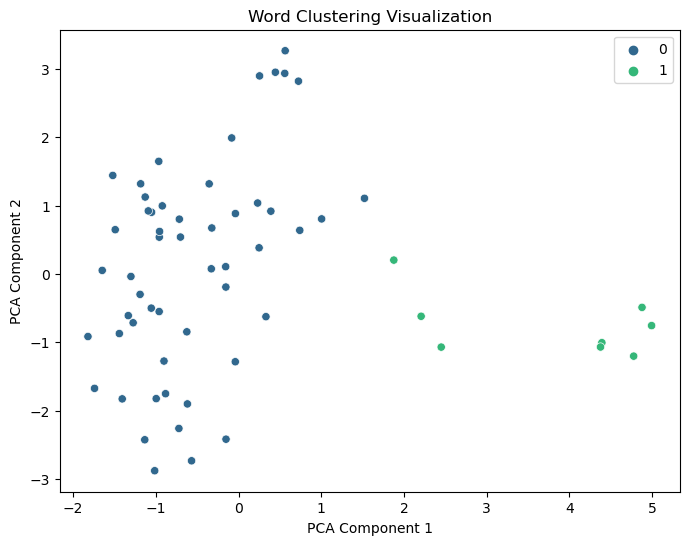

In [15]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=reduced_embeddings[:, 0], y=reduced_embeddings[:, 1], hue=clusters, palette="viridis", legend=True)
plt.title("Word Clustering Visualization")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()


In [16]:
for cluster in sorted(word_df["Cluster"].unique()):
    print(f"Cluster {cluster}:", ", ".join(word_df[word_df["Cluster"] == cluster]["Word"].tolist()))

Cluster 0: subset, climate, crucial, renewable, machine, based, levels., wind, patterns, is, focuses, global, weather, sustainability., utilizes, learning, sources, impacts, ai, like, indicators, and, energy, speculative, solar, change, on, fluctuates, tasks, a, behaviors., pattern, worldwide., transforming, recognition., sentiment., that, are, volatility, image, sea, the, of, exhibit, intelligence, networks, for, complex, artificial, neural, power, deep, high
Cluster 1: industries, markets, economic, stock, market, trading, cryptocurrency, investor
